<a href="https://colab.research.google.com/github/SarathSabu/Python-Notebooks/blob/main/Word2vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Content in this notebook is modified from the [Word2Vec Application Tutorial](https://colab.research.google.com/drive/1X3XmmomQZrR-rPGbo_w6yydDbui86tzK)

In this lecture, we go over basic operations on word vectors. There are many Natural Language Processing (NLP) libraries in Python, such as [NLTK](https://www.nltk.org/), [gensim](https://radimrehurek.com/gensim/), and [spaCy](https://spacy.io/). All of them have their own strength and focus. NLTK is one of the first comprehensive Python libraries for computational linguistics and has a big community. If you have worked on NLP, you probably have heard of it or used it. Gensim is a popular library for topic modeling. It also provides many functionalities similar to NLTK. It supports word embeddings and you can even train word embeddings using gensim. SpaCy is another popular NLP library and it provides built-in support for word vectors. We will use spaCy in this tutorial.  \\
<br>
You will learn:


1.   Popular Python machine learning packages (spaCy, sklearn)
2.   Calculating word similarity using Word2Vec model
3.   Word analogy analysis
4.   Calculating sentence similarity using Word2Vec model
5.   Dimension reduction techniques for high-dimensional vectors
6.   Visualizing Word2Vec in 2D space
7.   Sentiment analysis using logistic regression and Word2Vec



### Preliminary
First, let's install the spaCy Python library and download their model for the English language. We only need to do it once. Then we can import the spaCy library and other useful libraries such as numpy (used for linear algebra and vector operations in Python). We can load our downloaded English model in our environment.

In [ ]:
# Only needs to be run once at the top of the notebook
!pip install spacy
!python -m spacy download en_core_web_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.7/400.7 MB 3.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
# import packages
import spacy
import numpy as np
import csv
from sklearn.manifold import TSNE
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import clear_output

In [ ]:
nlp = spacy.load('en_core_web_lg')  # load the English model

### Word Similarity
By representing words in vectors, we can use linear algebra and vector space models to analyze the relationship between words. One simple task is to calculate the cosine of two word vectors, namely the cosine similarity. This cosine similarity measures the semantic similarity of words. While the value ranges from -1 to 1, it is usually used in the non-negative space [0, 1] where 0 means 0 similarity and 1 means extremely similar or even identical.

In order to calculate the cosine similarity between words, we have to know their vector representations first, which are provided by the Word2Vec model. In the spaCy English model, these vector representations (pretrained using Word2Vec) are already provided. All we need to do is to retrieve these words from the spaCy English model and we will have access to these vector representations. \\
<br>


In [ ]:
# retrieve words from the English model vocabulary
cat = nlp.vocab['cat']
dog = nlp.vocab['dog']
car = nlp.vocab['car']

# print the dimension of word vectors
print('vector length:', len(cat.vector))

# print the word vector
print('cat:', cat.vector)

vector length: 300
cat: [-0.15067   -0.024468  -0.23368   -0.23378   -0.18382    0.32711
 -0.22084   -0.28777    0.12759    1.1656    -0.64163   -0.098455
 -0.62397    0.010431  -0.25653    0.31799    0.037779   1.1904
 -0.17714   -0.2595    -0.31461    0.038825  -0.15713   -0.13484
  0.36936   -0.30562   -0.40619   -0.38965    0.3686     0.013963
 -0.6895     0.004066  -0.1367     0.32564    0.24688   -0.14011
  0.53889   -0.80441   -0.1777    -0.12922    0.16303    0.14917
 -0.068429  -0.33922    0.18495   -0.082544  -0.46892    0.39581
 -0.13742   -0.35132    0.22223   -0.144     -0.048287   0.3379
 -0.31916    0.20526    0.098624  -0.23877    0.045338   0.43941
  0.030385  -0.013821  -0.093273  -0.18178    0.19438   -0.3782
  0.70144    0.16236    0.0059111  0.024898  -0.13613   -0.11425
 -0.31598   -0.14209    0.028194   0.5419    -0.42413   -0.599
  0.24976   -0.27003    0.14964    0.29287   -0.31281    0.16543
 -0.21045   -0.4408     1.2174     0.51236    0.56209    0.14131
  0.

Try to retrieve some other words and check if they have the same dimension.

In [ ]:
computer = nlp.vocab['computer']
print(len(computer.vector))

300


After retrieving the words and their vector representations, we can use the built-in similarity function (which implements cosine similarity) to calculate word similarity based on these vectors. Is 'cat' more similar to 'dog' than 'car'? Can you find some properties of cosine similarity?

In [ ]:
# you can calculate the similarity between words using
# the built-in 'similarity' function
print('The similarity between cat and cat:', cat.similarity(cat))
print('The similarity between cat and dog:', cat.similarity(dog))
print('The similarity between dog and cat:', dog.similarity(cat))
print('The similarity between cat and car:', cat.similarity(car))
print('The similarity between dog and car:', dog.similarity(car))

The similarity between cat and cat: 1.0
The similarity between cat and dog: 0.8016854524612427
The similarity between dog and cat: 0.8016854524612427
The similarity between cat and car: 0.3190753161907196
The similarity between dog and car: 0.35629159212112427


Now let's try some other words. Also, try to calculate the cosine similarity between 'hotel' and 'motel' and the cosine similarity between 'hotel' and 'hospital'. Which one is more similar to 'hotel'? 'motel' or 'hospital'?

In [ ]:
# calculate the similarity of your own words using the built-in function
hotel = nlp.vocab['hotel']
motel = nlp.vocab['motel']
hospital = nlp.vocab['hospital']

# what is the similarity between (hotel, motel) and (hotel, hospital)
print(hotel.similarity(motel))
print(hotel.similarity(hospital))

0.7404688596725464
0.38639551401138306


Now we know how to compare the similarity of two words using pretrained Word2Vec model. We can also use it to help us find semantically similar words, that is given a word retrieve similar words from the vocabulary.

Following, let's try to find the most semantically similar word from a list of words.

In [ ]:
# Define a function to find the most similar word
def most_similar_word(target_word, word_list):
    target_token = nlp(target_word)

    if not target_token.has_vector:
        print(f"Warning: '{target_word}' does not have a word vector in en_core_web_sm.")
        return None

    max_similarity = -1
    most_similar = None

    for word in word_list:
        token = nlp(word)
        if token.has_vector:  # Ensure the word has a vector representation
            similarity = target_token.similarity(token)
            if similarity > max_similarity:
                max_similarity = similarity
                most_similar = word
    return most_similar

In [ ]:
# Example usage
word_list = ["dog", "cat", "fish", "apple", "car", "puppies", "pet"]
target = "puppy"
similar_word = most_similar_word(target, word_list)

print(f"The most similar word to '{target}' is '{similar_word}'.")

The most similar word to 'puppy' is 'puppies'.


### Word Analogy
One interesting finding for the Word2Vec model is that it embeds some analogical relationships between words. \\
<br>
*Man is to Woman as King is to Queen* \\
Man - Woman = King - Queen \\
<br>
*Paris is to France as Madrid is to Spain* \\
Paris - France = Madrid - Spain \\
<br>
These relationships can be reconstructed using word embeddings. \\
<br>
![analogy](https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2017/06/06062705/Word-Vectors.png)

In [ ]:
# word analogy example
# king is to man as what is to woman?
king = nlp.vocab['king']
man = nlp.vocab['man']
woman = nlp.vocab['woman']

# resulting vector
result = king.vector - man.vector + woman.vector

In [ ]:
# what word does the 'result' vector closely correspond to?
queen = nlp.vocab['queen']

from sklearn.metrics.pairwise import cosine_similarity
print('Similarity between queen and result:', cosine_similarity(result.reshape(1, -1), queen.vector.reshape(1, -1)))

Similarity between queen and result: [[0.78808445]]


Let's try: \\
Paris - France = Madrid - Spain

In [ ]:
# another example
# Paris is to France as Madrid is to what?
Paris = nlp.vocab['Paris']
France = nlp.vocab['France']
Madrid = nlp.vocab['Madrid']
maybe_Spain = France.vector - Paris.vector + Madrid.vector
Spain = nlp.vocab['Spain']


print('Similarity between queen and result:', cosine_similarity(maybe_Spain.reshape(1, -1), Spain.vector.reshape(1, -1)))

Similarity between queen and result: [[0.7725211]]


### Sentence/Document Level Similarity
Using word embeddings, we can also calculate similarity between sentences and documents. More advanced models such as Doc2Vec or neural networks can be used, but in this tutorial we will continue to use Word2Vec model to calculate document similarity. Since sentences and documents are composed of words, one easy way to obtain vector representations for sentences/documents is to calculate the average vectors of words. \\
<br>
Let's try to calculate the similarity among these three sentences:


1. "The dog is playing in the park."
2. "A puppy is having fun at the playground."
3. "The car is parked near the shopping mall."



In [ ]:
# Word2Vec model does not provide vector representations for sentences
# or documents. How is the similarity between sentences computed?
# Since sentences are composed of words, an easy way to obtain the vector
# representations of sentences is by averaging the vectors of each word in
# the sentence.

s1 = 'The dog is playing in the park.'
s2 = 'A puppy is having fun at the playground.'
s3 = 'The car is parked near the shopping mall.'
sent_list = [s1, s2, s3]

corpus_vec = []
for sent in sent_list:
    # nlp(sent) performs several steps to "sent"
    # First, it splits the sentence into individual tokens (words, punctuations, etc.)
    # Part-of-speech tagging, assigns a grammatical category (e.g., noun, verb, etc.) to each token
    # Dependency parsing -- analyze the syntactic structure and establish relationships between words.
    # Named entity recognition
    # Lemmatization -- reduce words to their base form (e.g., running --> run)
    # Vectorization (if available) -- assigns word embeddings if the word exists in the model
    doc = nlp(sent)
    sent_vec = []
    for token in doc:
        ## print(token.text)
        sent_vec += [token.vector]
    sent_vec = np.mean(sent_vec, axis=0)
    corpus_vec.append(sent_vec)


print('Similarity between s1 and s2:', cosine_similarity(corpus_vec[0].reshape(1, -1), corpus_vec[1].reshape(1, -1))[0])
print('Similarity between s1 and s3:', cosine_similarity(corpus_vec[0].reshape(1, -1), corpus_vec[2].reshape(1, -1))[0], '\n')

# Spacy can automatically construct sentence embedding by average the word embeddings.
sent_1 = nlp(s1)
sent_2 = nlp(s2)
sent_3 = nlp(s3)

print('Similarity between s1 and s2:', sent_1.similarity(sent_2))
print('Similarity between s2 and s3:', sent_1.similarity(sent_3))

Similarity between s1 and s2: [0.9069085]
Similarity between s1 and s3: [0.82167923] 

Similarity between s1 and s2: 0.9069085121154785
Similarity between s2 and s3: 0.8216792345046997


In [ ]:
# While the sentence embeddings reveal that s1 is more similar to s2 than to s3, the similarity score between s2 and s3 is still high.
# What could be the reason?

sent_1 = nlp(s1)
sent_2 = nlp(s2)
sent_3 = nlp(s3)

sent_1_no_stop = nlp(' '.join([str(t) for t in sent_1 if not t.is_stop]))
sent_2_no_stop = nlp(' '.join([str(t) for t in sent_2 if not t.is_stop]))
sent_3_no_stop = nlp(' '.join([str(t) for t in sent_3 if not t.is_stop]))

print('Similarity between s1 and s2:', sent_1_no_stop.similarity(sent_2_no_stop))
print('Similarity between s2 and s3:', sent_1_no_stop.similarity(sent_3_no_stop))

Similarity between s1 and s2: 0.8482343554496765
Similarity between s2 and s3: 0.6506569385528564


Removing stopwords increases the difference in the two similarity scores.

### Word Embeddings Visualization
Since the word vectors we use have 300 dimensions, we cannot visualize them. One natural way is to apply dimension reduction first and then visualize them. We use a popular dimension reduction technique called PCA (Principal Component Analysis) to reduce the word vectors to 2D and then plot the words in our word analogy example to see if we can find some pattern visually. \\
<br>
An interactive visualization of word embeddings can be found here: \\
[https://projector.tensorflow.org/](https://projector.tensorflow.org/)

In [ ]:
from sklearn.decomposition import PCA
data = np.array([king.vector, man.vector, queen.vector, woman.vector])

# Principla component analysis is a dimensionality reduction technique that transforms
# data into a new coordinate system, where the axes are orthogonal and represent the
# directions of maximum variance in the original data.
# This allows for simplifying datasets while retaining important information and making
# data easier to visualize and analyze.

pca = PCA(n_components= 2)
word_vectors_reduced = pca.fit_transform(data)  # Shape: (num_words, target_dim)

print(word_vectors_reduced)

[[-3.7271984  2.1668932]
 [ 3.212085   2.148608 ]
 [-3.2678554 -2.482027 ]
 [ 3.782969  -1.8334746]]


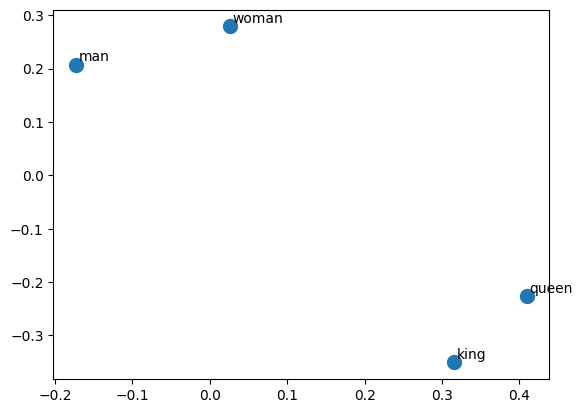

In [ ]:
# plot the 2d vectors and show their labels
plt.scatter(data[:, 0], data[:, 1], s=100)
labels = ['king', 'man', 'queen', 'woman']

for i, txt in enumerate(labels):
    plt.annotate(txt, (data[i,0], data[i,1]), xytext=(2, 3), textcoords='offset points')
plt.show()

### Sentiment Analysis
The major reason for coming up with word embedding models is that we want to use these embeddings which encode the word semantics to help us tackle problems related with natural language. \\
<br>
One such task is sentiment analysis. By analyzing the sentiment of texts, we want to understand whether a given sentence/document is positive or negative. For example, 'the weather is so nice today' has a positive sentiment whereas 'he is bored by the movie' has a negative sentiment. \\
<br>
In this tutorial, we want to use the word embeddings combined with a simple machine learning model ([logistic regression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)) to do sentiment analysis. Logistic regression is a linear classification model and in our case we want to classify whether a given sentence is positive or negative. So it's a binary classification. \\
<br>
![logistic](https://rasbt.github.io/mlxtend/user_guide/classifier/SoftmaxRegression_files/logistic_regression_schematic.png)
<br>
Our training data contains 2,748 from Yelp reviews, IMDB movie reviews, and Amazon reviews. In the dataset, 1 means positive and 0 means negative. The original data can be downloaded from [here](https://www.kaggle.com/rahulin05/sentiment-labelled-sentences-data-set/data), the combined file can be downloaded from [here](https://drive.google.com/file/d/1knrjvDNkiXtviXBoLm5OJY45_kcCmDxe/view?usp=sharing).

In [ ]:
# load files into the environment
from google.colab import files
uploaded = files.upload()

Saving combined_training.txt to combined_training.txt


In [ ]:
# read data
data_raw = []
with open('combined_training.txt', newline='') as fr:
    reader = csv.reader(fr, delimiter='\t')
    for row in reader:
        data_raw.append([row[0], int(row[1])])

# print the number of data
print(len(data_raw))

# print the last data item
print(data_raw[-1])

2748
["Then, as if I hadn't wasted enough of my life there, they poured salt in the wound by drawing out the time it took to bring the check.", 0]


In [ ]:
x_train = np.array([nlp(d[0]).vector for d in data_raw])
y_train = np.array([d[1] for d in data_raw])

# print the dimension of x
print(x_train.shape)

# print the dimension of y
print(y_train.shape)

# double check
print(nlp(data_raw[-1][0]).text, y_train[-1])

(2748, 300)
(2748,)
Then, as if I hadn't wasted enough of my life there, they poured salt in the wound by drawing out the time it took to bring the check. 0


In [ ]:
logreg = linear_model.LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression()

In [ ]:
# predict using trained model
predict = logreg.predict(np.array([nlp('the weather yesterday is good').vector, nlp('the food in this restaurant is below my expectation').vector]))
print(predict)

[1 0]
